In [29]:
import pandas as pd 
df=pd.read_csv("heights.csv")
df.head()


,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [30]:
Q1,Q3 = df.height.quantile([0.25,0.75])
Q1,Q3

(5.3500000000000005, 6.275)

In [31]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [32]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5* IQR
lower,upper 

(3.962500000000001, 7.6625)

In [33]:
df[(df.height<lower)|(df.height>upper)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [34]:
#So the above condition is to check for the outliers 


In [35]:
df_new = df[(df.height > lower)& (df.height<upper)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


In [36]:
#Outlier removal is one of the method of treating the outlier 

Outlier removal using Box Plot

In [37]:
import matplotlib.pyplot as plt
df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [38]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [39]:
# if you want to use IQR for spotting all those outliers u have to first create dataframe for all these region because 
#sales range will be different for all these 

In [40]:
df_apac = df[df.Region=="APAC"]
df_europe = df[df.Region=="Europe"]
df_americas = df[df.Region=="Americas"]

In [41]:
def get_lower_upper(data):
    Q1,Q3 = data.Sales.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower = Q1- 1.5 *IQR
    upper = Q3 + 1.5*IQR 
    return lower,upper

In [42]:
lower,upper = get_lower_upper(df_apac)
lower,upper

(-737.125, 59747.875)

In [43]:
df_apac.Sales.describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [44]:
#So this thing is within the boundary so there is no outlier for apac 

In [45]:
#Now finding if there are anyoutliers for europe

In [46]:
lower,upper = get_lower_upper(df_europe)
lower,upper

(7306.875, 17665.875)

In [47]:
df_europe.Sales.describe()

count       12.000000
mean     13147.583333
std       3549.568795
min       9665.000000
25%      11191.500000
50%      12044.000000
75%      13781.250000
max      23000.000000
Name: Sales, dtype: float64

In [48]:
#Give me all the values which are greater than my upper boundary
df_europe[df_europe.Sales>upper]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [49]:
lower,upper = get_lower_upper(df_americas)
lower,upper

(16832.375, 38473.375)

In [50]:
df_americas.Sales.describe()

count       12.000000
mean     28356.750000
std       3610.368556
min      23407.000000
25%      24947.750000
50%      28770.500000
75%      30358.000000
max      34102.000000
Name: Sales, dtype: float64

In [51]:
# so there are no outliers in americas 


So now using BOX PLOT 


In [52]:
labels = df['Region'].unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [57]:
plot_data = [df['Sales'][df['Region']==label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896]),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895]),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387])]

/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_51923/3758771305.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


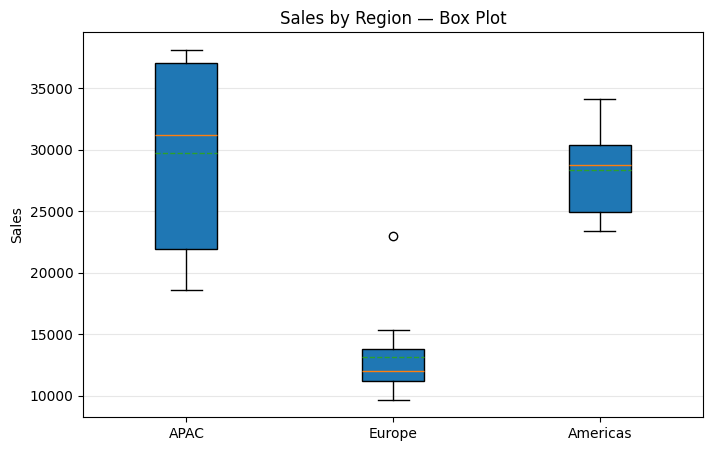

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(
    plot_data,
    labels=labels,
    showmeans=True,     # show mean as a line
    meanline=True,
    patch_artist=True   # filled boxes
)
plt.title("Sales by Region — Box Plot")
plt.ylabel("Sales")
plt.grid(axis='y', alpha=0.3)
plt.show()